In [1]:
import numpy as np
import math as mt
import matplotlib.pyplot as plt
import random 
%matplotlib inline
import pylab

Ejercicio 2. Con ayuda del algoritmo de aceptación y rechazo, y utilizando la densidad y el algoritmo que
creo en el ejercicio anterior vamos a simular observaciones de una distribución normal estándar, en este caso
vamos a utilizar $\alpha = 0$.

2.1. Encuentre el valor de M, tal que f(x) ≤ Mg(x), cuidando que la probabilidad de aceptación sea óptima.

Queremos simular
\begin{equation}
f(x; \mu=0, \sigma=1)= \frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}}
\end{equation}
a través de la función instrumental
\begin{equation}
y \sim g(y; \alpha, \beta)= \frac{\beta}{2}e^{-\beta |x|} \hspace{0.1cm} con \hspace{0.1cm} \alpha=0
\end{equation}

Simular $M \in \mathbb{R} \ \backepsilon f(x) \leqslant Mg(x) $. Sea $ h(x) = \frac{f(x)}{g(x)} \leqslant M $, debemos encontrar el máximo de h(x)

\begin{equation}
h(x)= \frac{\frac{1}{\sqrt{2\pi}}e^{\frac{-x^{2}}{2}}}{\frac{\beta}{2}e^{-\beta |x|}} = \frac{2}{\sqrt{2\pi} \beta} e^{\frac{-x^{2}}{2} + \beta |x|}
\end{equation}

Usamos el kernel,

\begin{equation}
\hat{h}(x) = e^{\frac{-x^{2}}{2} + \beta |x|}
\end{equation}

Para el máximo,

\begin{equation}
log(\hat{h}(x))= log(e^{\frac{-x^{2}}{2} + \beta |x|}) = \frac{-x^{2}}{\beta |x|}
\end{equation}

\begin{equation}
\frac{\partial log(\hat{h}(x))}{\partial x}= -x + \beta \frac{\partial |x|}{\partial x}= -x + \beta \frac{x}{|x|}=0
\end{equation}

Esto implica que,

\begin{equation}
-x + \beta \frac{x}{|x|}=0
\end{equation}

\begin{equation}
x (-1+ \frac{\beta}{|x|})=0
\end{equation}

\begin{equation}
x= 0 \land -1+ \frac{\beta}{|x|}=0
\end{equation}

\begin{equation}
\frac{\beta -|x|}{|x|}=0
\end{equation}

\begin{equation}
\beta -|x|=0, |x| \neq 0
\end{equation}

\begin{equation}
|x|=\beta , |x| \neq 0
\end{equation}

\begin{equation}
x=0 \land x= -\beta 
\end{equation}

Pero $\beta >0$, entonces $ x= \beta$, ¿es máximo?

\begin{equation}
\frac{\partial^2 log(\hat{h}(x))}{\partial x} = -1 < 0
\end{equation}

Por lo tanto, $x^{*} = \beta $ es el máximo.
$M = h(x*)= \frac{2}{\sqrt{2\pi} \beta} e^{\frac{-\beta^{2}}{2} + \beta |\beta|}= \frac{2}{\sqrt{2\pi} \beta} e^{\frac{-\beta^{2}}{2} + \beta^{2}}$

Ahora hay que encontrar a $\beta^{*}$ que minimiza a $M(\beta)$,

\begin{equation}
\hat{M}(\beta)= e^{\frac{-\beta^{2}}{2} + \beta^{2}}
\end{equation}

\begin{equation}
log(\hat{M}(\beta))= log(e^{\frac{-\beta^{2}}{2} + \beta^{2}}) = log(e^{\frac{-\beta^{2}}{2}) - log(\beta) = \frac{-\beta^{2}}{2} + \beta^{2}} - log(\beta)
\end{equation}

\begin{equation}
\frac{\partial^2 log(\hat{M}(\beta))}{\partial x}= \beta^{2} - \frac{1}{\beta} = 0
\end{equation}

\begin{equation}
\frac{\beta^{3} -1}{\beta}=0 \implies \beta^{3}-1=0 \implies \beta^{3}=1 \implies \beta^{*}=1
\end{equation}

¿Es mínimo?

\begin{equation}
\frac{\partial^2 log(\hat{M}(\beta))}{\partial x} = 2 \beta + \frac{1}{\beta^{2}}
\end{equation}

Por un lado, $\beta >0 \implies 2\beta >0$ y $\beta^{2}>0 \implies \frac{1}{\beta^{2}} >0$. Por lo tanto, $\beta^{*}=1$ sí es mínimo.

\begin{equation}
M(\beta^{*})= \frac{2}{\sqrt{2\pi}} e^{1/2}
\end{equation}

Luego, hay que encontrar el valor de $\frac{f(x)}{Mg(x)}$

\begin{equation}
\frac{f(x)}{Mg(x)}= \frac{h(x)}{M} = \frac{\frac{2}{\sqrt{2\pi}} e^{\frac{-x^{2}}{2} +|x|}}{\frac{2}{\sqrt{2\pi}} e^{1/2}} = e^{\frac{-x^{2}}{2} +|x| - \frac{1}{2}}
\end{equation}

2.2. ¿Cuántas iteraciones se necesitan para aceptar una simulación de Y como una de X?

$P(Aceptar)= \frac{1}{M}= \frac{1}{\frac{2}{\sqrt{2\pi}} e^{1/2}} = \frac{\sqrt{2\pi}}{2} e^{1/2}$

In [19]:
#Es igual a 
((mt.sqrt(2*mt.pi))/(2))*(np.exp(1/2))

2.0663656770612464

2.3 Haga un algoritmo para generar normales estándar utilizando A-R prográmelo y haga un histograma con
1, 000, 000 de observaciones y compárelo con la densidad real.

In [2]:
def Generag(alpha,beta):
    v=random.random()
    if v < 1/2:
        y=alpha + (np.log(2*v))/beta
    else:
        y=alpha - (np.log(2-2*v))/beta
    return y

In [3]:
def Normal(alpha,beta):
    valor=0
    v=1
    while valor<=v:
        y=Generag(alpha,beta)
        v=random.random()
        valor=np.exp(-((y**2)/2) + abs(y)-(1/2))
    return y

In [4]:
def GeneraNormales(alpha,beta,N):
    Simulaciones=[]
    for i in range(N):
        x=Normal(alpha,beta)
        Simulaciones.append(x)
    return Simulaciones

In [5]:
observaciones=GeneraNormales(0,1,1000000)

In [13]:
def NormalEstandar(x):
    g=(1/(2*mt.pi)**(1/2))*np.exp(-(x**2)/2)
    return g

In [14]:
xGrid2=np.arange(min(observaciones),max(observaciones),0.01)

In [15]:
yGrid2=[]
for i in range(len(xGrid2)):
        yGrid2.append(NormalEstandar(x=xGrid2[i]))

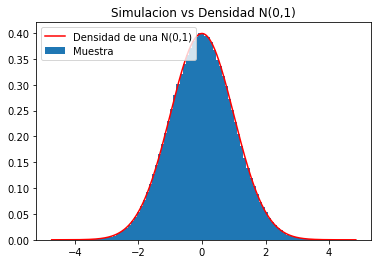

In [16]:
pylab.plot(xGrid2, yGrid2, color="red", label='Densidad de una N(0,1)')
pylab.hist(observaciones, 100, density=True, label='Muestra')
pylab.legend(loc='upper left')
pylab.title("Simulacion vs Densidad N(0,1)")
pylab.show()